# **Importation des différentes bases et librairies**

In [ ]:
###########Importation des différentes librairies############

import pandas as pd 
import numpy as np 
import keras as ks
import matplotlib.pyplot as plt #Graphiques basiques
import matplotlib.image as mpimg #image en trois dimensions (avec couleur)
import seaborn as sns #Diagrammes en barres 
import itertools
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split #Tests de validation croisée
from sklearn import metrics #Calculs des taux de prédition
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix #Matrice de confusion
#from keras.utils.np_utils import to_categorical
#from keras.preprocessing.image import ImageDataGenerator

sns.set(style='white', context='notebook', palette='deep')

In [ ]:
###########Importations des bases############  

#Importation des bases situées sur mon drive
from google.colab import drive
drive.mount('/content/gdrive')
train = pd.read_csv('/content/gdrive/My Drive/IAE/M2-S1/Python/Projet python/Bases/train.csv',sep =",")
test = pd.read_csv('/content/gdrive/My Drive/IAE/M2-S1/Python/Projet python/Bases/test.csv', sep=",")

# **Traitement préliminaire de la base**

In [ ]:
# Partitionnement de la base avec train_test_split
     # on prend 5000 obs pour train soit 11.9% de la base initiale 
     # on prend 1000 obs pour test soit 2.38% de la base initiale
from sklearn.model_selection import train_test_split

# Définition des variables
Y = train["label"]
X = train.drop(labels = ["label"],axis = 1) 

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/42, train_size=5/42)
    #étant donné qu'il s'agit d'un partitionnement aléatoire les résultats seront légèrement différents d'un split à l'autre

Y_train=np.ravel(Y_train)
Y_test=np.ravel(Y_test)

# Dimensions
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5000, 784)
(5000,)
(1000, 784)
(1000,)


# **Statistiques descriptives**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


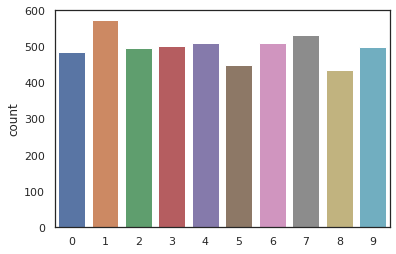

In [ ]:
#Distribution de la variable Y
sns.countplot(Y_train)

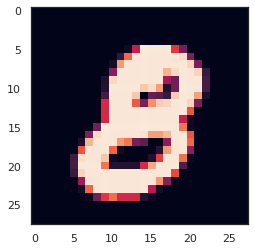

In [ ]:
#On normalise les données 
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

#On met les données en trois dimensions pour les aficher dans un graphique 
#(hauteur = 28px, largeur = 28px , puissance du trait 0<x<1)
X_train_reshaped = X_train_scaled.values.reshape(-1,28,28,1)
#test = test.values.reshape(-1,28,28,1)

#On affiche l'image 
g = plt.imshow(X_train_reshaped[0][:,:,0])

# **Classification KNN (commentaires détaillés pour l'exemple)**




>## Tests In-Sample

In [ ]:
#On va réaliser ici un modèle sur l'ensemble de la base et le tester sur cette même base

from sklearn.neighbors import KNeighborsClassifier # On importe la fonction K-Nearest
knn=KNeighborsClassifier(n_neighbors=3)
# On définit les paramètres de notre modèle k-nearest 
#(ici le nombre de plus proches voisins=3)

knn.fit(X_train, Y_train) # On ajuste ('fit') notre modèle sur notre jeu d'entrainement

#Qualité de prévision sur l'échantillon d'entrainement (in-sample) (Taux de bonne prédiction)
#On cherche ici à savoir si le modèle est bon pour prédire la classe des observations sur lesquelles il s'est entrainé
#Analogie avec l'élève qui calcule son niveau en refaisant les exercices qu'il a déjà fait 
#et regarde ensuite sa proportion de bonnes réponses.

knn.score(X_train,Y_train)

#Le modèle réussi à bien prédire 96,64% des classes des observations sur lesquelles il s'est déjà entrainé.
#Analogie : l'élève réussi 96,64% des exercies qu'il a déjà fait.

0.9664

>## Test par cross-validation hors échantillon d'entrainement

In [ ]:
#La validation croisée permet plusieurs choses : 
#Donner une meilleure précision du taux d'erreur hors échantillon d'entrainement et/ou augmenter la qualité 
#d'ajustement des paramêtres d'un modèle (exemple régression linéaire par MCO)
#Ici nous allons nous interesser à la première fonctionalité, la deuxième est utilisée plus bas.


# Pour éviter cela, nous allons tester plusieurs découpages différents à l'aide de la validation croisée:

#Etape 1:
#L'idée est ici de diviser notre base de départ en k morceaux (K-folds), (par exemple 10).

#Etape 2: 
#Laisser un morceau de côté et prendre les autres morceaux (ici 9) pour créer une base d'entrainement.

#Etape 3:
# Ajuster le modèle sur la base d'entrainement (comprenant 90% des observations)

#Etape 4 :
# Tester le modèle sur le morceau que l'on a mit de côté (10% des obs), 
#on regarde le taux de prédiction et on le conserve.

#Etape 5:
#On réitère les étapes 2 à 4 pour tous les morceaux (10) et on calcule la moyenne des taux de prédiction trouvés, 
#on obtient le taux de prédiction (=1-Taux d'erreur) de cross-validation (moyenne des 10 taux trouvés)

#Code :

knn=KNeighborsClassifier(n_neighbors=3)
cv_results = cross_val_score(knn, X_train, Y_train, cv=10)

moyenne_cv_results = cv_results.mean()
print("Taux de prédiction trouvés : {}" .format(cv_results))
print("Taux de prédiction de Cross-Validation (moyenne) : {}" .format(moyenne_cv_results))

#Le taux moyen de bonne prediction est de 93,24% sur les 10 ajustements/tests de modèles.
# Le taux est moins bon mais plus révélateur de ce que pourra nous fournir le modèle sur l'échantillon test 

#Analogie : l'élève réussi en moyenne 93,24% des exercies qu'il n'avait pas fait auparavant .

Taux de prédiction trouvés : [0.938 0.93  0.944 0.916 0.926 0.926 0.938 0.952 0.942 0.912]
Taux de prédiction de Cross-Validation (moyenne) : 0.9324


>## Prévision des données de la base test (Out of sample forecasting)
(Ici on ajuste notre modèle sans passer par la cross validation pour les ajustements des paramètres)

In [ ]:
#On entraine d'abord notre modèle sur notre base de données train
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)

print("Taux de prédiction sur le jeu de données test:", metrics.accuracy_score(Y_test, Y_pred), "\n") #Taux de bonne prédiction
print(metrics.confusion_matrix(Y_test, Y_pred)) #Matrice de confusion

#92,4% de bonnes prédictions


Taux de prédiction sur le jeu de données test: 0.924 

[[101   0   0   0   0   0   0   0   0   0]
 [  0 113   0   1   0   0   0   0   0   0]
 [  0   3  80   1   1   0   0   2   1   0]
 [  2   2   2  91   0   0   0   0   1   0]
 [  0   3   0   0 103   0   1   0   0   5]
 [  0   1   0   3   0  82   1   0   1   2]
 [  2   0   0   0   1   2  88   0   0   0]
 [  0   4   0   1   0   0   0  82   0   3]
 [  0   1   0   7   0   3   0   1  89   5]
 [  2   0   1   1   2   0   0   7   0  95]]


# **Regression logistique multinomiale (méthode non-paramétrique)**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

#On centre-réduit nos variables explicatives sinon l'algorithme risque de ne pas converger
#vers des coefficients finis.
X_scaled_train = preprocessing.scale(X_train)
X_scaled_test = preprocessing.scale(X_test)

logreg = LogisticRegression()
logreg.fit(X_scaled_train,Y_train)

#Taux de prédiction sur l'échantillon d'entrainement(in-sample), ici toute la base : 100%
print("Taux de prédiction sur échantillon d'entrainement : {}" .format(logreg.score(X_scaled_train,Y_train)))

#Taux de prédiction moyen à l'aide de la cross validation:
cv_results = cross_val_score(logreg, X_scaled_train, Y_train, cv=10)
moyenne_cv_results = cv_results.mean()
print("Taux dde prédiction trouvés : {}" .format(cv_results))
print("Taux de prédiction de Cross-Validation (moyenne) : {}" .format(moyenne_cv_results))

#Le taux moyen de bonne prediction est de 88,6% sur les 10 test de modèles,
#ce qui est moins bon qu'avec la méthode des plus proches voisins (KNN)(-2%)

#On va maintenant essayer de prédire les classes de la base test 
#On entraine d'abord notre modèle sur notre base de données train
logreg.fit(X_scaled_train,Y_train)
Y_pred=logreg.predict(X_scaled_test)

print("Taux de prédiction sur le jeu de données test:", metrics.accuracy_score(Y_test, Y_pred), "\n") #Taux de bonne prédiction
print(metrics.confusion_matrix(Y_test, Y_pred)) #Matrice de confusion

#88,24% de bonnes prédictions, moins bon que k-nn

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Taux de prédiction sur échantillon d'entrainement : 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Taux dde prédiction trouvés : [0.884 0.878 0.912 0.874 0.894 0.874 0.878 0.9   0.906 0.888]
Taux de prédiction de Cross-Validation (moyenne) : 0.8888
Taux de prédiction sur le jeu de données test: 0.878 

[[ 99   0   0   0   0   1   0   0   1   0]
 [  0 109   0   1   0   3   0   0   0   1]
 [  0   5  70   1   2   0   2   3   4   1]
 [  0   2   5  83   0   3   3   0   2   0]
 [  0   1   1   0 100   0   2   0   1   7]
 [  2   0   0   3   3  75   0   0   5   2]
 [  1   1   1   0   0   1  88   0   1   0]
 [  1   0   4   1   1   0   0  80   0   3]
 [  0   3   1   2   1   8   1   4  82   4]
 [  1   0   3   2   2   0   0   7   1  92]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **SVM linéaire**

In [ ]:
from sklearn.svm import SVC
model_linear = SVC(kernel='linear')

# Taux de prédiction sur l'échantillon d'entrainement :
#On ajuste le modèle SVM linéaire sur toute la base:
model_linear.fit(X_train,Y_train)
#Taux de prédiction sur l'échantillon d'entrainement(in-sample), ici toute la base : 100%
print("Taux de prédiction sur échantillon d'entrainement : {}" .format(model_linear.score(X_train,Y_train)))


#Taux de prédiction moyen à l'aide de la cross validation:
cv_results = cross_val_score(model_linear, X_train, Y_train, cv=10)
moyenne_cv_results = cv_results.mean()
print("Taux de prédiction trouvés : {}" .format(cv_results))
print("Taux de prédiction de Cross-Validation (moyenne) : {}" .format(moyenne_cv_results))

#Le taux moyen de bonne prediction est de 91,08% sur les 10 test de modèles,
#ce qui est meilleur qu'avec la méthode des plus proches voisins (KNN)(+1,3%)

#On va maintenant essayer de prédire les classes de la base test 
#On entraine d'abord notre modèle sur notre base de données train
model_linear.fit(X_train,Y_train)
Y_pred=model_linear.predict(X_test)

print("Taux de prédiction sur le jeu de données test:", metrics.accuracy_score(Y_test, Y_pred), "\n") #Taux de bonne prédiction
print(metrics.confusion_matrix(Y_test, Y_pred)) #Matrice de confusion

 #90,53% de bonnes prédictions, meilleur que knn et logreg pour l'instant


Taux de prédiction sur échantillon d'entrainement : 1.0
Taux de prédiction trouvés : [0.912 0.912 0.924 0.906 0.912 0.894 0.9   0.928 0.902 0.918]
Taux de prédiction de Cross-Validation (moyenne) : 0.9107999999999998
Taux de prédiction sur le jeu de données test: 0.905 

[[100   0   0   1   0   0   0   0   0   0]
 [  0 112   0   0   0   1   0   0   0   1]
 [  0   2  81   0   2   0   1   1   1   0]
 [  0   2   1  90   0   3   1   0   1   0]
 [  0   2   0   0 102   0   2   0   2   4]
 [  2   0   0   4   4  74   1   0   5   0]
 [  1   0   1   0   1   1  89   0   0   0]
 [  0   0   2   2   1   0   0  84   0   1]
 [  0   2   0   4   3   4   1   1  88   3]
 [  1   0   2   1   7   1   0  11   0  85]]


# **SVM non-linéaire (C et Gamma)**

In [ ]:
#Ici on va se servir de la deuxième fonctionnalité de la Cross-Validation (comme évoqué plus tôt), 
#c'est à dire optimiser les paramètres d'un modèle, ça marcherait aussi pour une régression linéaire basique (type MCO)

#On utilise une validation croisée en 5 segments (5-folds CV)
from sklearn.model_selection import KFold
segments = KFold(n_splits = 4, shuffle = True, random_state = 10)

#On spécifie les hyper-paramètres, c'est à dire les paramètres qui seront testés lors de la cross validation:

hyper_params = [ {'gamma': [0.000001,0.0000001],
                     'C': [3,5]}]
#On vient donc spécifier les différents C et Gamma qui seront testés par Cross Validation


# On utilise toujours un modèle avec une fonction de noyau RBF.
model = SVC(kernel="rbf")

# On spécifie une table de paramètres de la Cross validation(GridSearchCV()) 
#qui reprend les hyper-paramètres et les paramètres de la segmentation évoqués plus haut
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = segments, 
                        verbose = 1,
                        return_train_score=True)      

# On ajuste le modèle
model_cv.fit(X_train,Y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

#Ici nous est donné un tableau avec toutes les informations concernant les différents modèles possibles
#pour chaque combinaison de C et Gamma, le meilleur modèle en termes de qualité moyenne de prédiction ('mean_test_score' ou 'cross val')
#est celui ou les paramètres valent {'C': 3, 'gamma': 0.0000001} avec un pourcentage de prédiction moyen de 98,7%
#Ce qui est mieux que tous les modèles jusqu'à présent.
  
#Sont aussi présents dans le tableaux les temps d'ajustement des modèles.

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  8.8min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,28.267186,0.122838,5.447781,0.197770,3,1e-06,"{'C': 3, 'gamma': 1e-06}",0.9288,0.9384,0.9312,0.9312,0.9324,0.003600,3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,5.463795,0.051807,2.771039,0.049167,3,1e-07,"{'C': 3, 'gamma': 1e-07}",0.9488,0.9408,0.9432,0.9456,0.9446,0.002960,1,0.985867,0.988533,0.988800,0.986133,0.987333,0.001340
2,28.148613,0.147135,5.326193,0.033938,5,1e-06,"{'C': 5, 'gamma': 1e-06}",0.9288,0.9384,0.9312,0.9312,0.9324,0.003600,3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,5.374381,0.128507,2.741961,0.058517,5,1e-07,"{'C': 5, 'gamma': 1e-07}",0.9480,0.9336,0.9424,0.9480,0.9430,0.005889,2,0.993600,0.993600,0.996267,0.993867,0.994333,0.001122


In [ ]:
#Il existe aussi une fonction qui donne directement les meilleurs hyperparamètres retenus pour la suite :

meilleure_qualite = model_cv.best_score_
meilleurs_hyperparam = model_cv.best_params_

print("la meilleure qualité de prévision est {0} correspondant aux hyper paramètres {1}".format(meilleure_qualite, meilleurs_hyperparam))
#Qualité de prévision de 94.46%, meilleure que tout pour l'instant car très très difficile de séparer linéairement des chiffres les uns sur les autres

la meilleure qualité de prévision est 0.9445999999999999 correspondant aux hyper paramètres {'C': 3, 'gamma': 1e-07}


In [ ]:
#on va réaliser les prédictions sur la base test avec le meilleur modèle 
#On spécifie les paramètres du modèle que l'on a déterminé avant
model_non_linear_svm =  SVC(kernel="rbf", C=3,gamma=0.0000001)

#On entraine d'abord notre modèle sur notre base de données train
model_non_linear_svm.fit(X_train,Y_train)
Y_pred=model_non_linear_svm.predict(X_test)

print("Taux de prédiction sur le jeu de données test:", metrics.accuracy_score(Y_test, Y_pred), "\n") #Taux de bonne prédiction
print(metrics.confusion_matrix(Y_test, Y_pred)) #Matrice de confusion

 #94,5% de bonnes prédictions=très bonne prédiction, il faudrait encore ajuster les paramètres du noyau : C et Gamma 
 #autour des valeurs prédites ici, et également tenter d'ajuster les paramètres du modèle par cross validation

Taux de prédiction sur le jeu de données test: 0.945 

[[101   0   0   0   0   0   0   0   0   0]
 [  0 112   0   1   0   1   0   0   0   0]
 [  0   1  84   0   1   0   0   1   1   0]
 [  0   0   3  92   0   1   1   0   1   0]
 [  0   1   0   0 106   0   2   0   0   3]
 [  2   0   0   3   0  80   0   0   5   0]
 [  2   0   0   0   1   2  88   0   0   0]
 [  0   2   1   1   1   0   0  84   0   1]
 [  0   1   0   0   1   3   0   0  99   2]
 [  2   1   0   1   2   0   0   3   0  99]]


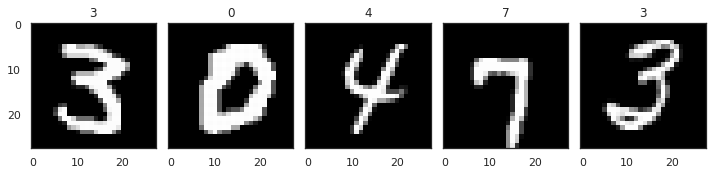

In [ ]:
#Affichage de certains chiffres 
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(10,6))
axs = axs.flatten()

prediction = model_non_linear_svm.predict(X_train.iloc[0:1000])
n=-1
for i in [11,2,3,15,5]:
    n=n+1
    im = X_train.iloc[i]
    im = im.values.reshape(-1,28,28,1)
    axs[n].imshow(im[0,:,:,0], cmap=plt.get_cmap('gray'))
    axs[n].set_title(prediction[i])
    plt.tight_layout()  




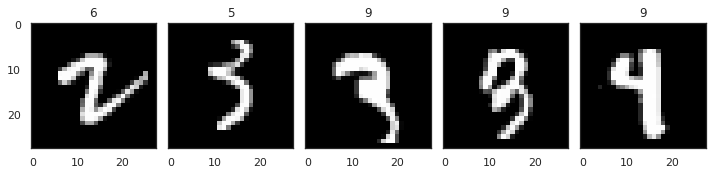

In [ ]:
#Pour les chiffres mal écrits
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(10,6))
axs = axs.flatten()
n=-1
for i in [184,298,338,642,837]:
    n=n+1
    im = X_train.iloc[i]
    im = im.values.reshape(-1,28,28,1)
    axs[n].imshow(im[0,:,:,0], cmap=plt.get_cmap('gray'))
    axs[n].set_title(prediction[i])
    plt.tight_layout()  

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(X_train,Y_train)


#Taux de prédiction sur l'échantillon d'entrainement(in-sample), ici toute la base : 100%
print("Taux de prédiction sur échantillon d'entrainement : {}" .format(Random_forest_model.score(X_train,Y_train)))


#Taux de prédiction moyen à l'aide de la cross validation:
cv_results = cross_val_score(Random_forest_model, X_train, Y_train, cv=10)
moyenne_cv_results = cv_results.mean()
print("Taux dde prédiction trouvés : {}" .format(cv_results))
print("Taux de prédiction de Cross-Validation (moyenne) : {}" .format(moyenne_cv_results))

#Le taux moyen de bonne prediction est de 93.6% sur les 10 tests de modèles.

#On va maintenant essayer de prédire les classes de la base test 
#On entraine d'abord notre modèle sur notre base de données train
Random_forest_model.fit(X_train,Y_train)
Y_pred=Random_forest_model.predict(X_test)

print("Taux de prédiction sur le jeu de données test:", metrics.accuracy_score(Y_test, Y_pred), "\n") #Taux de bonne prédiction
print(metrics.confusion_matrix(Y_test, Y_pred)) #Matrice de confusion

 #92.5% de bonnes prédictions, soit 2% mieux que le SVM linéaire et 2% moins bien que le SVM non linéaire

NameError: ignored

# **Arbre décisionels - méthode non-paramétrique**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


arbre_dec_model = DecisionTreeClassifier()
arbre_dec_model.fit(X_train,Y_train)


#Taux de prédiction sur l'échantillon d'entrainement(in-sample), ici toute la base : 100%
print("Taux de prédiction sur échantillon d'entrainement : {}" .format(arbre_dec_model.score(X_train,Y_train)))


#Taux de prédiction moyen à l'aide de la cross validation:
cv_results = cross_val_score(arbre_dec_model, X_train, Y_train, cv=10)
moyenne_cv_results = cv_results.mean()
print("Taux dde prédiction trouvés : {}" .format(cv_results))
print("Taux de prédiction de Cross-Validation (moyenne) : {}" .format(moyenne_cv_results))

#Le taux moyen de bonne prediction est de 77.8% sur les 10 test de modèles

#On va maintenant essayer de prédire les classes de la base test 
#On entraine d'abord notre modèle sur notre base de données train
arbre_dec_model.fit(X_train,Y_train)
Y_pred=arbre_dec_model.predict(X_test)

print("Taux de prédiction sur le jeu de données test:", metrics.accuracy_score(Y_test, Y_pred), "\n") #Taux de bonne prédiction
print(metrics.confusion_matrix(Y_test, Y_pred)) #Matrice de confusion

 #77,1% de bonnes prédictions, le moins bon modèle pour l'instant


Taux de prédiction sur échantillon d'entrainement : 1.0
Taux dde prédiction trouvés : [0.78  0.754 0.776 0.762 0.786 0.774 0.808 0.798 0.786 0.758]
Taux de prédiction de Cross-Validation (moyenne) : 0.7782000000000001
Taux de prédiction sur le jeu de données test: 0.771 

[[ 91   1   1   2   1   1   1   0   2   1]
 [  0 102   2   4   1   3   0   1   1   0]
 [  1   3  59   6   4   2   1   9   3   0]
 [  0   2   7  76   1   5   2   0   2   3]
 [  1   1   2   2  88   4   0   3   1  10]
 [  5   3   3   5   1  60   2   2   6   3]
 [  0   2   1   0   5  11  71   1   1   1]
 [  1   3   4   1   2   0   0  75   2   2]
 [  1   2   3  11   6   3   2   2  67   9]
 [  1   0   1   5   7   0   0  11   1  82]]


# **Neural Networks (perceptron multi-couches)** Avec Sklearn

In [ ]:


import numpy as np 
import pandas as pd 

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split #Tests de validation croisée
from sklearn import metrics #Calculs des taux de prédition
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix #Matrice de confusion


def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_

from google.colab import drive
drive.mount('/content/gdrive')
train = pd.read_csv('/content/gdrive/My Drive/IAE/M2-S1/Python/Projet python/Bases/train.csv',sep =",")
test = pd.read_csv('/content/gdrive/My Drive/IAE/M2-S1/Python/Projet python/Bases/test.csv', sep=",")

#train = pd.read_csv('train.csv',sep =",")
#test = pd.read_csv('test.csv',sep =",")

y = train["label"]
X = train.drop(["label"],axis = 1)
X_test = test

X = X/255.0
X_test = X_test/255.0


mode = "edit"
if mode == "edit" :
    nr_samples = 4000
if mode == "commit" :    
    nr_samples = 30000
y_train=y[:nr_samples]
X_train=X[:nr_samples]
start_ix_val = nr_samples 
end_ix_val = nr_samples + int(nr_samples/3)
y_val=y[start_ix_val:end_ix_val]
X_val=X[start_ix_val:end_ix_val]
print("nr_samples train data:", nr_samples)
print("start_ix_val:", start_ix_val)
print("end_ix_val:", end_ix_val)


Sklearn_MLP = MLPClassifier(activation = "logistic", hidden_layer_sizes=(200,100), random_state=0)
param_grid = { 'batch_size' : [200,100] , 'max_iter': [200], 
               'solver': ['adam'],'tol': [0.001,0.0001] }
    
GridCV_MLP = GridSearchCV(Sklearn_MLP, param_grid, verbose=1, cv= 3)

GridCV_MLP.fit(X_train,y_train)
cv_results = pd.DataFrame(GridCV_MLP.cv_results_)
print(cv_results)

meilleure_qualite = GridCV_MLP.best_score_
meilleurs_hyperparam = GridCV_MLP.best_params_


print("la meilleure qualité de prévision est {0} correspondant aux hyper paramètres {1}".format(meilleure_qualite, meilleurs_hyperparam))

modele_MLP = MLPClassifier(activation = "logistic", hidden_layer_sizes=(200,100), random_state=0, batch_size = 100, max_iter = 200, solver = 'adam', tol = 0.001)

#On entraine d'abord notre modèle sur notre base de données train
modele_MLP.fit(X_train,y_train)
Y_pred = modele_MLP.predict(X_val)

print("Taux de prédiction sur le jeu de données test:", metrics.accuracy_score(y_val, Y_pred), "\n") #Taux de bonne prédiction
print(metrics.confusion_matrix(y_val, Y_pred))


Mounted at /content/gdrive
nr_samples train data: 4000
start_ix_val: 4000
end_ix_val: 5333
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  4.8min finished


   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0      18.098451      0.435742  ...        0.004600                4
1      29.677219      0.051984  ...        0.004229                1
2      18.115009      0.156432  ...        0.005257                2
3      29.317711      0.588324  ...        0.004736                3

[4 rows x 15 columns]
la meilleure qualité de prévision est 0.9182507395964433 correspondant aux hyper paramètres {'batch_size': 200, 'max_iter': 200, 'solver': 'adam', 'tol': 0.0001}
Taux de prédiction sur le jeu de données test: 0.9317329332333083 

[[113   0   0   1   0   0   5   0   0   0]
 [  0 151   2   0   0   1   0   0   1   0]
 [  0   0 151   0   1   0   1   1   2   0]
 [  1   1   2 125   0   6   0   0   4   1]
 [  0   0   0   0 112   0   0   0   0   3]
 [  1   2   0   5   0 101   3   0   2   3]
 [  0   0   1   0   0   2 131   0   1   0]
 [  0   2   3   0   2   0   0 130   0   3]
 [  1   3   5   1   0   1   2   1 110   3]
 [  0   0   1  

# Neural network avec keras 
(pour controler le nombre de couche et la taille des couche, créer des couche de type CNN et RNN)

##Importation des librairies, mise en forme des X et Y train et test

In [ ]:
import numpy as np 
import pandas as pd 

from google.colab import drive
drive.mount('/content/gdrive')
train = pd.read_csv('/content/gdrive/My Drive/IAE/M2-S1/Python/Projet python/Bases/train.csv',sep =",")
test = pd.read_csv('/content/gdrive/My Drive/IAE/M2-S1/Python/Projet python/Bases/test.csv', sep=",")

import random as rn

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns



import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import uniform

import itertools

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import AvgPool2D, BatchNormalization, Reshape
from keras.optimizers import Adadelta, RMSprop, Adam
from keras.losses import categorical_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier

import tensorflow as tf

import os

def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))
    
    return acc_sc

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')


def plot_history_loss_and_acc(history_keras_nn):

    fig, axs = plt.subplots(1,2, figsize=(12,4))

    axs[0].plot(history_keras_nn.history['loss'])
    axs[0].plot(history_keras_nn.history['val_loss'])
    axs[0].set_title('model loss')
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'validation'], loc='upper left')

    axs[1].plot(history_keras_nn.history['accuracy'])
    axs[1].plot(history_keras_nn.history['val_accuracy'])
    axs[1].set_title('model accuracy')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'validation'], loc='upper left')

    plt.show()
    
    

y = train["label"]
X = train.drop(["label"],axis = 1)
X_test = test

X = X/255.0
X_test = X_test/255.0


mode = "edit"
if mode == "edit" :
    nr_samples = 5000
if mode == "commit" :    
    nr_samples = 30000
y_train=y[:nr_samples]
X_train=X[:nr_samples]
start_ix_val = nr_samples 
end_ix_val = nr_samples + int(1000)
y_val=y[start_ix_val:end_ix_val]
X_val=X[start_ix_val:end_ix_val]
print("nr_samples train data:", nr_samples)
print("start_ix_val:", start_ix_val)
print("end_ix_val:", end_ix_val)

y_train = to_categorical(y_train, 10)
y_val_10 = to_categorical(y_val, 10)




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
nr_samples train data: 5000
start_ix_val: 5000
end_ix_val: 6000


##Modèle 1 seule couche

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 0s 17ms/step - loss: 2.1362 - accuracy: 0.2472 - val_loss: 1.7855 - val_accuracy: 0.5170
Epoch 2/30
16/16 [==============================] - 0s 5ms/step - loss: 1.6016 - accuracy: 0.6300 - val_loss: 1.3963 - val_accuracy: 0.7210
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 1.2648 - accuracy: 0.7512 - val_loss: 1.1472 - val_accuracy: 0.7730
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 1.0513 - accuracy: 0.7912 - val_loss: 0.9889 - val_accuracy: 0.7990
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.9129 - accu

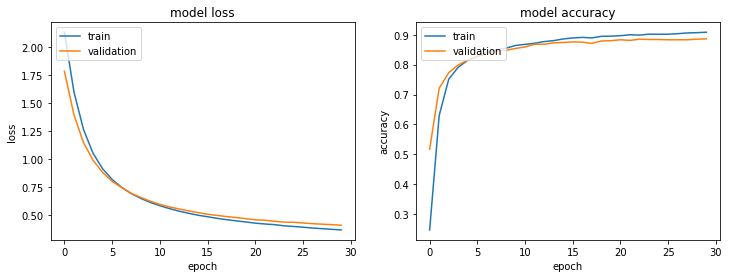

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.90      0.97      0.93        96
           2       0.90      0.86      0.88       111
           3       0.85      0.81      0.83       103
           4       0.91      0.90      0.90        99
           5       0.81      0.73      0.77        75
           6       0.93      0.92      0.92        98
           7       0.94      0.91      0.93       117
           8       0.84      0.84      0.84        96
           9       0.82      0.90      0.86       107

    accuracy                           0.89      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.89      0.89      1000

Accuracy : 0.886
[[ 96   0   0   0   0   0   1   0   0   1]
 [  0  93   1   0   0   0   0   0   2   0]
 [  1   1  96   3   1   1   0   4   2   2]
 [  1   1   4  83   0   8   2   1   2   1]
 [  1   1   0   0  89   1   1 

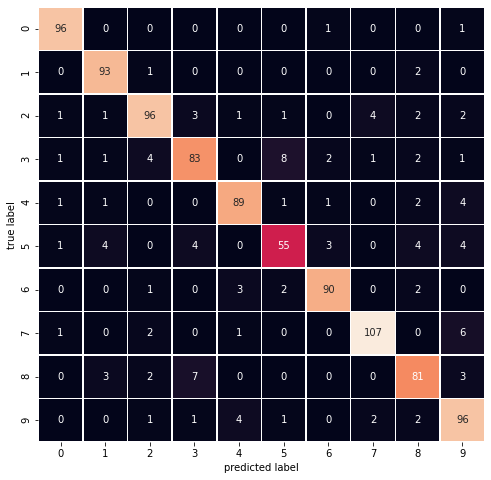

In [ ]:
batchsize = int(nr_samples/15) 

def dense_model_0():
    model = Sequential()
    model.add(Dense(10, input_dim=784, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_dense_0 = dense_model_0()
model_dense_0.summary()

#model_dense_0.fit(X_train, y_train, epochs=20, batch_size=batchsize)

history_dense_0 = model_dense_0.fit(X_train, y_train, validation_data=(X_val,y_val_10), 
                                    epochs=30, batch_size=batchsize)


plot_history_loss_and_acc(history_dense_0)

pred_val_dense0 = model_dense_0.predict_classes(X_val)

acc_fc0 = print_validation_report(y_val, pred_val_dense0)

plot_confusion_matrix(y_val, pred_val_dense0)

print(confusion_matrix(y_val, pred_val_dense0))


##Modèle 4 couches : 3 chachées 1 visible

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 119,810
Trainable params: 119,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 0s 24ms/step - loss: 1.7008 - accuracy: 0.5286 - val_loss: 0.9418 - val_accuracy: 0.7610
Epoch 2/30
16/16 [==============================] - 0s 10ms/step - loss: 0.6790 - accuracy: 0.8110 - val_

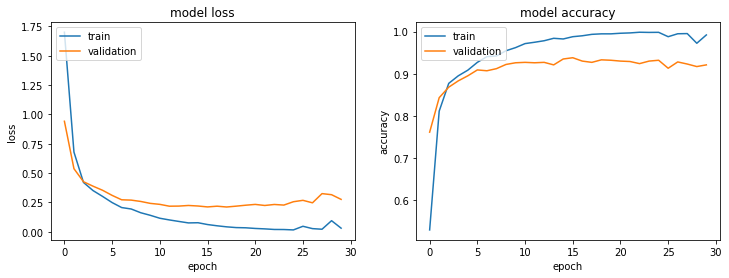

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        98
           1       0.94      0.99      0.96        96
           2       0.91      0.90      0.90       111
           3       0.95      0.84      0.89       103
           4       0.92      0.97      0.95        99
           5       0.78      0.92      0.84        75
           6       0.98      0.94      0.96        98
           7       0.93      0.96      0.94       117
           8       0.88      0.86      0.87        96
           9       0.97      0.84      0.90       107

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

0.921
[[ 97   0   0   0   0   0   0   0   1   0]
 [  0  95   1   0   0   0   0   0   0   0]
 [  1   1 100   2   1   2   0   3   1   0]
 [  1   0   1  87   0  11   0   0   2   1]
 [  0   0   0   0  96   2   1   0   0   0]
 [  1   2   1   0   

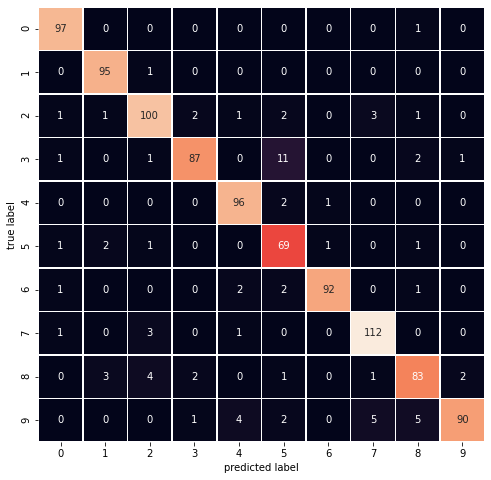

In [ ]:
def dense_model_3():
    
    model = Sequential()  
    model.add(Dense(100, activation='relu', input_dim=784))
    model.add(Dense(200, activation='relu')) 
    model.add(Dense(100, activation='relu')) 
    model.add(Dense(10, activation='softmax'))
         
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    
    return model

model_dense_3 = dense_model_3()
model_dense_3.summary()

history_dense_3 = model_dense_3.fit(X_train, y_train, validation_data=(X_val,y_val_10), 
                                    epochs=30, batch_size=batchsize)

plot_history_loss_and_acc(history_dense_3)

pred_val_dense3 = model_dense_3.predict_classes(X_val)
plot_confusion_matrix(y_val, pred_val_dense3)
print(classification_report(y_val, pred_val_dense3))
acc_fc3 = accuracy_score(y_val, pred_val_dense3)
print(acc_fc3)

print(confusion_matrix(y_val, pred_val_dense3))

##Test 1 modèle avec couches convolutionelles

In [ ]:
y = train["label"]
X = train.drop(["label"],axis = 1)
X_test = test

X = X/255.0
X_test = X_test/255.0


mode = "edit"
if mode == "edit" :
    nr_samples = 2000
if mode == "commit" :    
    nr_samples = 30000
y_train=y[:nr_samples]
X_train=X[:nr_samples]
start_ix_val = nr_samples 
end_ix_val = nr_samples + int(nr_samples/3)
y_val=y[start_ix_val:end_ix_val]
X_val=X[start_ix_val:end_ix_val]
print("nr_samples train data:", nr_samples)
print("start_ix_val:", start_ix_val)
print("end_ix_val:", end_ix_val)

y_train = to_categorical(y_train, 10)
y_val_10 = to_categorical(y_val, 10)

batchsize = int(nr_samples/15) 

img_rows, img_cols = 28, 28

X_train = X_train.values.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val = X_val.values.reshape(X_val.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

X_train.shape
y_train.shape

batchsize = 128
epochs = 20

activation = 'relu'
adadelta = Adadelta()
loss = categorical_crossentropy

def cnn_model_1(activation):
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation=activation, input_shape=input_shape)) 
    
    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())

    model.add(Dense(128, activation=activation))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss=loss, optimizer=adadelta, metrics=['accuracy'])

    return model

model_cnn_1 = cnn_model_1(activation)
model_cnn_1.summary()

history_cnn_1 = model_cnn_1.fit(X_train, y_train, validation_data=(X_val,y_val_10), 
                                   epochs=epochs, batch_size=batchsize, verbose=1)
plot_history_loss_and_acc(history_cnn_1)
pred_val_cnn1 = model_cnn_1.predict_classes(X_val)
plot_confusion_matrix(y_val, pred_val_cnn1)
print(classification_report(y_val, pred_val_cnn1))
acc_cnn1 = accuracy_score(y_val, pred_val_cnn1)
print(acc_cnn1)


NameError: ignored

##Test 2 avec modèle convolutionnel


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)               295168    
_________________________________________________________________
dense_59 (Dense)             (None, 10)              

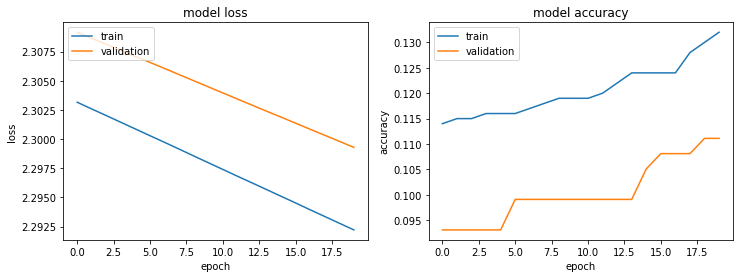

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      0.22      0.34        23
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        46
           3       0.08      0.04      0.05        28
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00        35
           6       0.06      0.14      0.08        36
           7       0.13      0.81      0.22        32
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00        34

    accuracy                           0.11       333
   macro avg       0.11      0.12      0.07       333
weighted avg       0.08      0.11      0.06       333

0.1111111111111111


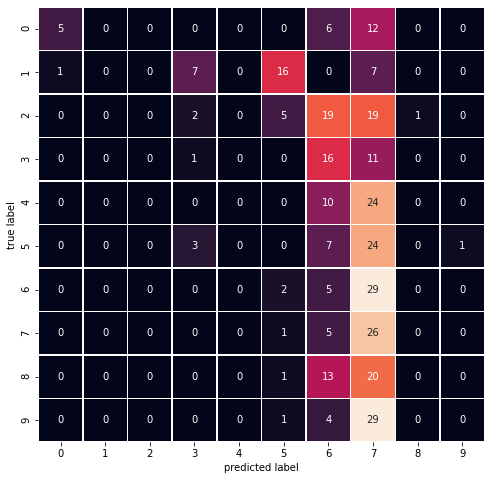

In [ ]:

def cnn_model_2(optimizer,loss):

    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding = 'Same', activation="relu", input_shape=input_shape ))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(32, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())

    model.add(Dense(256, activation=activation))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy']) 

    return model


model_cnn_2 = cnn_model_2(adadelta, categorical_crossentropy)
model_cnn_2.summary()

#model_cnn_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
history_cnn_2 = model_cnn_2.fit(X_train, y_train, validation_data=(X_val,y_val_10), 
                                epochs=epochs, batch_size=150, verbose=1)


plot_history_loss_and_acc(history_cnn_2)

pred_val_cnn2 = model_cnn_2.predict_classes(X_val)
plot_confusion_matrix(y_val, pred_val_cnn2)
print(classification_report(y_val, pred_val_cnn2))
acc_cnn2 = accuracy_score(y_val, pred_val_cnn2)
print(acc_cnn2)
